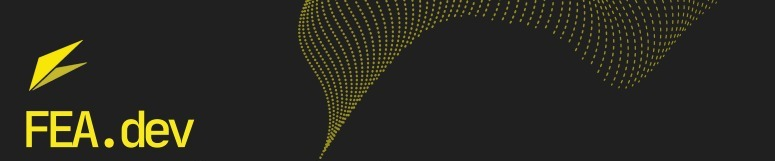


# Fala devs, blz?? 

Esta será nossa quinta lista de exercícios para você testar seu conhecimento acerca do conteúdo do MÓDULO 3:

-Pandas I

## INSTRUÇÕES:

A lista deve ser realizada pelo Jupyter Notebook.

Nâo é necessário entregar a lista para afins de certificado dentro da plataforma, entretanto para alunos da USP que queiram participar do processo seletivo ou conseguir créditos AAC (apenas FEANOS) é necessária a entrega de TODAS as listas.

A entrega das listas ou pelo menos sua excecução é recomendada a fim de exercitar todo o conhecimento adquirido do curso.

O DESAFIO é para realmente te desafiar, por isso não desista de tentar e de continuar com o curso, ao longo das listas você verá que cada vez mais você terá ferramentas para completá-lo.

Caso haja alguma dúvida acerca da lista participe das monitorias que serão oferecidas as quintas e sábados das 17h as 18h pelo DISCORD. Caso seu problema não seje resolvido envie uma mensagem para contato.feadev@gmail.com

O gabarito será disponibilizado na plataforma após o término de periodo de envio



Toda nossa lista 5 abordará uma temática única de acordo com a base de dados escolhida para a realização da mesma.

**PAÍSES MENOS CORRUPTOS SÃO MAIS FELIZES?**

Será que a felicidade e a corrupção têm alguma relação? A resposta a essa pergunta não é tão clara quanto gostaríamos que fosse. A felicidade é o que todos desejam, enquanto a corrupção é frequentemente vista como algo que a sociedade deve combater. No entanto, a conexão direta entre esses dois conceitos é desafiadora de estabelecer.

A corrupção é prejudicial, pois mina a confiança nas instituições públicas e distorce a alocação de recursos. Isso certamente não soa como um ingrediente para a felicidade. No entanto, em muitos lugares, a corrupção é endêmica, mas as pessoas ainda relatam altos níveis de felicidade. Isso nos faz questionar se a percepção de felicidade pode ser independente da corrupção.

Talvez as pessoas se adaptem à corrupção, ou talvez outros fatores, como economia e segurança, desempenhem um papel mais significativo em sua felicidade. Em última análise, a relação entre felicidade e corrupção é complexa, e as respostas podem variar dependendo do contexto.

Portanto, a questão persiste: **será que a corrupção realmente impede a felicidade? Ou será que a felicidade pode ser encontrada em meio à corrupção?**

vamos utilizar da base de dados Happiness and Corruption 2015-2020

https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

para chegar em alguma conclusão sobre o tema

## QUESTÃO 0

Carregue os dados do arquivo "happiness_corruption.csv" em um DataFrame e mostre as primeiras 5 linhas do DataFrame 

baixe a base pelo link abaixo: https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

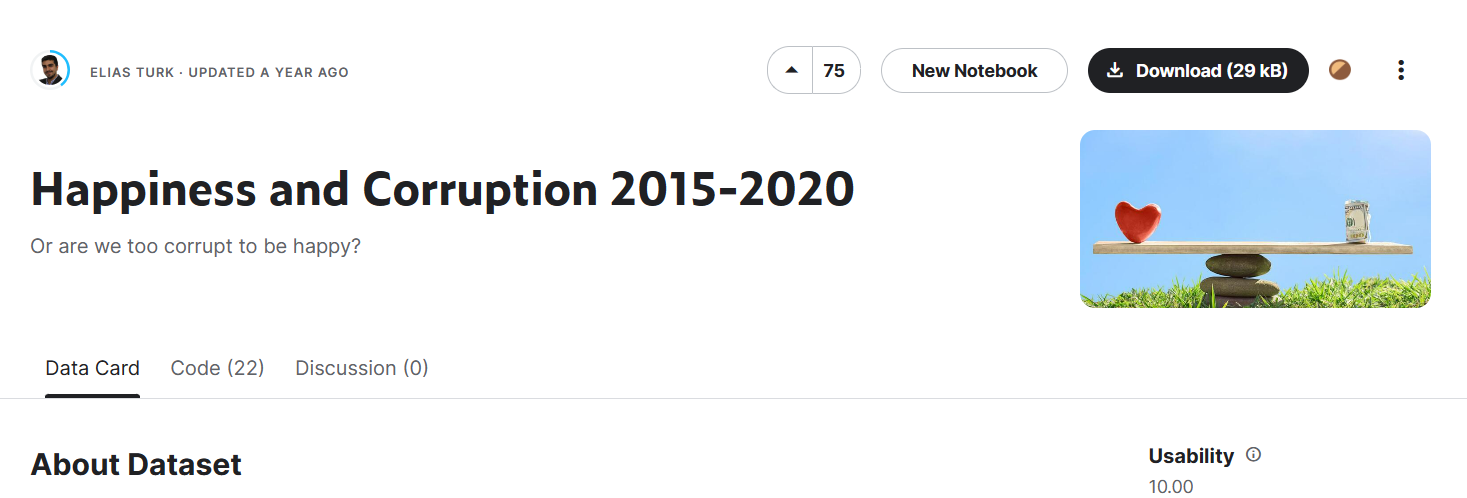

In [1]:
import pandas as pd

df = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')

In [2]:
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


## QUESTÃO 1


**Exploração Inicial dos Dados**

a) Verifique o número de linhas e colunas no DataFrame. **lembre-se do método .shape**


In [3]:
#seu codigo começa aqui
linha, coluna = df.shape

print(f'A quantidade de linhas são: {linha} e a de colunas são: {coluna}')

A quantidade de linhas são: 792 e a de colunas são: 13


b) Liste as colunas presentes no DataFrame. **lembre-se do método .columns**


In [4]:
#seu codigo começa aqui
columns = df.columns

for col in columns:
    print(col)

Country
happiness_score
gdp_per_capita
family
health
freedom
generosity
government_trust
dystopia_residual
continent
Year
social_support
cpi_score


c) Verifique se há valores nulos em cada coluna.

In [5]:
#seu codigo começa aqui
valores_nulos_por_coluna = df.isnull().sum()
print(f"Valores nulos por coluna:\n{valores_nulos_por_coluna}")

Valores nulos por coluna:
Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64


## QUESTÃO 2

a) Remova as colunas não relevantes que não serão usadas na análise, como "generosity" (generosidade), "family"(familia),
"health"( saúde), "freedom" (liberdade), "dystopia_residual"(distopia residual), "social_support" (suporte social) e "cpi_score"

In [6]:
#seu codigo começa aqui
df = df.drop(['generosity', 'family', 'health', 'freedom', 'dystopia_residual', 'social_support','cpi_score'], axis=1)

b) 
Renomeie as colunas para torná-las mais descritivas. Por exemplo, renomeie "Score" para "Pontuacao_Felicidade", "Country" para "Países", "GDP per capita" para "PIB_Per_Capita", "continent" para "Continentes", "Year" para "ano" e government_trust para "confian_gov".

In [7]:
df = df.rename(columns={"happiness_score":"Felicidade", "Country":"Países", "gdp_per_capita":"PIB_Per_Capita", "continent":"Continentes", "Year":"ano", "government_trust":"confian_gov" })

## QUESTÃO 3



**Estatísticas Descritivas**

Calcule estatísticas descritivas para as colunas relevantes: "Score" (pontuação de felicidade), "GDP per capita" (PIB per capita) e "Corruption Perception" (percepção de corrupção) e . Mostre a média, mediana, desvio padrão, mínimo e máximo para cada uma dessas colunas.

In [8]:
score_media = df['Felicidade'].mean()
score_mediana = df['Felicidade'].median()
score_std = df['Felicidade'].std()
score_max = df['Felicidade'].max()
score_min = df['Felicidade'].min()
print(f'A média da coluna felicidade é: {score_media:.2f}, a mediana: {score_mediana:.2f}, o desvio padrão: {score_std:.2f}, o máximo: {score_max:.2f} e o mínimo: {score_min:.2f}')

pib_media = df['PIB_Per_Capita'].mean()
pib_mediana = df['PIB_Per_Capita'].median()
pib_std = df['PIB_Per_Capita'].std()
pib_max = df['PIB_Per_Capita'].max()
pib_min = df['PIB_Per_Capita'].min()
print(f'A média da coluna Pib é: {pib_media:.2f}, a mediana: {pib_mediana:.2f}, o desvio padrão: {pib_std:.2f}, o máximo: {pib_max:.2f} e o mínimo: {pib_min:.2f}')

corrupcao_media = df['confian_gov'].mean()
corrupcao_mediana = df['confian_gov'].median()
corrupcao_std = df['confian_gov'].std()
corrupcao_max = df['confian_gov'].max()
corrupcao_min = df['confian_gov'].min()
print(f'A média da coluna corrupcao é: {corrupcao_media:.2f}, a mediana: {corrupcao_mediana:.2f}, o desvio padrão: {corrupcao_std:.2f}, o máximo: {corrupcao_max:.2f} e o mínimo: {corrupcao_min:.2f}')

A média da coluna felicidade é: 5.47, a mediana: 5.49, o desvio padrão: 1.12, o máximo: 7.81 e o mínimo: 2.57
A média da coluna Pib é: 0.93, a mediana: 0.99, o desvio padrão: 0.39, o máximo: 2.10 e o mínimo: 0.00
A média da coluna corrupcao é: 0.13, a mediana: 0.09, o desvio padrão: 0.11, o máximo: 0.55 e o mínimo: 0.00


## QUESTÃO 4

Vamos usar somente o ano de 2019 para facilitar a análise.

a) Incluir no dataframe apenas as linhas do ano de 2019

In [9]:
#seu codigo começa aqui
data = df[df['ano'] == 2019]
data

,Países,Felicidade,PIB_Per_Capita,confian_gov,Continentes,ano
528,Denmark,7.526,1.44178,0.44453,Europe,2019
529,Switzerland,7.509,1.52733,0.41203,Europe,2019
530,Iceland,7.501,1.42666,0.14975,Europe,2019
531,Norway,7.498,1.57744,0.35776,Europe,2019
532,Finland,7.413,1.40598,0.41004,Europe,2019
...,...,...,...,...,...,...
655,Rwanda,3.515,0.32846,0.50521,Africa,2019
656,Benin,3.484,0.39499,0.06681,Africa,2019
657,Afghanistan,3.360,0.38227,0.07112,Asia,2019
658,Togo,3.303,0.28123,0.11587,Africa,2019


b) Criar um novo DataFrame com países que têm pontuação de felicidade acima da média global ( do exercicio anterior)

In [10]:

media_pontuacao_felicidade_ano = data['Felicidade'].mean()

paises_acima_da_media_ano = data['Felicidade'] > media_pontuacao_felicidade_ano

qntd_paises = paises_acima_da_media_ano.sum()

print(f"A quantidade de países que possum a pontuação de felicidade acima de média global são: {qntd_paises}")

A quantidade de países que possum a pontuação de felicidade acima de média global são: 65


# QUESTÃO 5

**Classificação**

Classifique o DataFrame resultante do Exercício 4 pela coluna "Score" em ordem decrescente. Mostre os 10 países com as maiores pontuações de felicidade. Isso é útil para responder a perguntas como:

Quais países têm os maiores níveis de felicidade? A classificação em ordem decrescente fornece uma lista dos países com as maiores pontuações de felicidade, destacando aqueles que estão no topo da lista.

Houve alguma mudança significativa na classificação da felicidade ao longo do tempo? Comparando a classificação em diferentes anos, é possível identificar se houve mudanças significativas na pontuação de felicidade de países específicos.

Quais países são modelos de sucesso em termos de felicidade? A classificação ajuda a identificar países que são frequentemente citados como exemplos de sucesso em termos de bem-estar e qualidade de vida.

In [13]:
#SEU CÓDIGO COMEÇA AQUI##

paises_score = data.sort_values(by='Felicidade', ascending=False)
paises_10 = data.head(10)

print(f'Os 10 maiores países com a pontuação de felicidade são:\n {paises_10}')



Os 10 maiores países com a pontuação de felicidade são:
           Países  Felicidade  PIB_Per_Capita  confian_gov    Continentes   ano
528      Denmark       7.526         1.44178      0.44453         Europe  2019
529  Switzerland       7.509         1.52733      0.41203         Europe  2019
530      Iceland       7.501         1.42666      0.14975         Europe  2019
531       Norway       7.498         1.57744      0.35776         Europe  2019
532      Finland       7.413         1.40598      0.41004         Europe  2019
533       Canada       7.404         1.44015      0.31329  North America  2019
534  Netherlands       7.339         1.46468      0.29927         Europe  2019
535  New Zealand       7.334         1.36066      0.41904      Australia  2019
536    Australia       7.313         1.44443      0.32331      Australia  2019
537       Sweden       7.291         1.45181      0.40867         Europe  2019


## QUESTÃO 6

**Agrupando Dados por Região**
Agrupe os dados por região (coluna "Region") e calcule a média das pontuações de felicidade para cada região. Ordene as regiões pela média de pontuação de felicidade em ordem decrescente.

In [16]:
### Seu código começa aqui  lembre do groupy.by
regiao_media = data.groupby('Continentes')['Felicidade'].mean()

regiao_pont = regiao_media.sort_values(ascending=False)

In [19]:
print(f'A média de felicidade para cada continente em região de ordem decrescente é:\n{regiao_pont}')

A média de felicidade para cada continente em região de ordem decrescente é:
Continentes
Australia        7.323500
North America    7.095333
Europe           6.091237
South America    5.891950
Asia             5.264784
Africa           4.275531
Name: Felicidade, dtype: float64


## QUESTÃO 7

**Lidando com Dados Ausentes**

Verifique se há dados ausentes no DataFrame e, se houver, retire a linha inteira em questão. Certifique-se de que o DataFrame não possui mais dados ausentes após o preenchimento.

In [24]:
#seu código começa aqui
dados_nulos = data.isnull().sum()
dados_nulos

Países            0
Felicidade        0
PIB_Per_Capita    0
confian_gov       0
Continentes       0
ano               0
dtype: int64

# Questão 8

Agora você tem uma base de dados limpa e com informações relevantes para responder algumas questões.

- Países mais ricos são mais felizes? 
- Países com maior confiança no governo (menos experiencias com corrupção) são mais felizes?
- Aonde se localizam os países mais felizes? Europa? Ásia?....


**Países com maior confiança no governo são mais felizes?**

a) Calcule a média da coluna "Confianca_Gov" para obter um valor médio que será usado como ponto de corte.

In [26]:
#seu codigo começa aqui

confiav_gov_media = data['confian_gov'].mean()
print(f'A média de confiança no governo é {confiav_gov_media:.2f}')

A média de confiança no governo é 0.13


b) Com base na média calculada, crie uma nova coluna no DataFrame que atribuirá um rótulo ("alta" ou "baixa") a cada país de acordo com sua confiança no governo em relação à média.

In [36]:
#seu codigo começa aqui

# Função para atribuir os rótulos "alta" ou "baixa" com base na média

def rotulo_confianca(media):
    if media > confiav_gov_media:
        return "Alta"
    else:
       return "Baixa"    



# Aplique a função para criar a nova coluna de rótulos

data['Rotulo_Confianca'] = df['confian_gov'].apply(rotulo_confianca)



C:\Users\anajb\AppData\Local\Temp\ipykernel_9980\1964337621.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rotulo_Confianca'] = df['confian_gov'].apply(rotulo_confianca)


In [38]:
data

,Países,Felicidade,PIB_Per_Capita,confian_gov,Continentes,ano,Rotulo_Confianca
528,Denmark,7.526,1.44178,0.44453,Europe,2019,Alta
529,Switzerland,7.509,1.52733,0.41203,Europe,2019,Alta
530,Iceland,7.501,1.42666,0.14975,Europe,2019,Alta
531,Norway,7.498,1.57744,0.35776,Europe,2019,Alta
532,Finland,7.413,1.40598,0.41004,Europe,2019,Alta
...,...,...,...,...,...,...,...
655,Rwanda,3.515,0.32846,0.50521,Africa,2019,Alta
656,Benin,3.484,0.39499,0.06681,Africa,2019,Baixa
657,Afghanistan,3.360,0.38227,0.07112,Asia,2019,Baixa
658,Togo,3.303,0.28123,0.11587,Africa,2019,Baixa


c) Após dividir os países em grupos, calcule a média da pontuação de felicidade para cada grupo separadamente.


In [42]:
media_grupo = data.groupby('Rotulo_Confianca')['Felicidade'].mean().round(1)
media_grupo

Rotulo_Confianca
Alta     6.1
Baixa    5.0
Name: Felicidade, dtype: float64

d) Use um gráfico de barras para representar a relação entre o nível de confiança no governo e a média da pontuação de felicidade. Cada barra no gráfico representa um grupo (alta ou baixa) e a altura da barra representa a média da pontuação de felicidade para esse grupo.

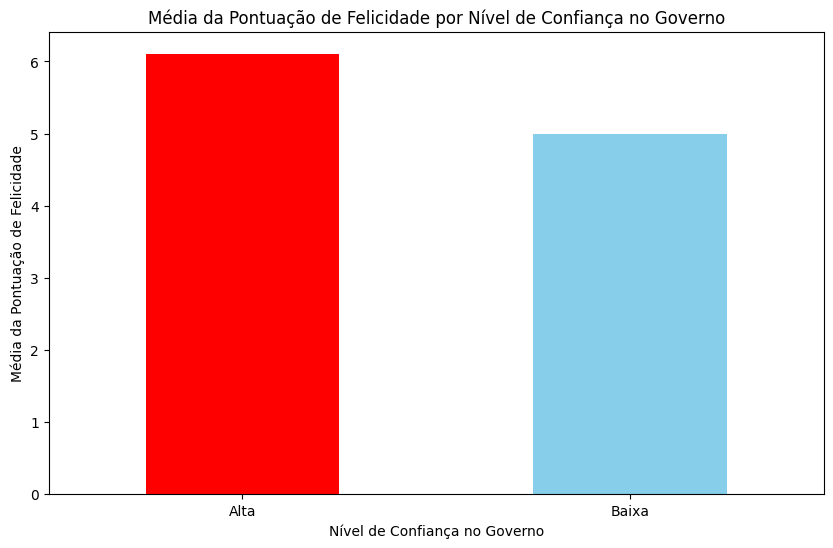

In [48]:
# seu codigo começa aqui
import matplotlib.pyplot as plt

color = 'red', 'skyblue'
plt.figure(figsize=(10, 6))
media_grupo.plot(kind='bar', color=color) ## bar = grafico em barras  ## skyblue é a cor do grafico
plt.title('Média da Pontuação de Felicidade por Nível de Confiança no Governo')  ## dê um titulo 
plt.xlabel('Nível de Confiança no Governo')  ## o que você quer no eixo x
plt.ylabel('Média da Pontuação de Felicidade')    ## o que você quer no eixo y
plt.xticks(rotation=0)
plt.show()

e) qual é a conclusão de **Países com maior confiança no governo são mais felizes?**

Países com maior confiança no governo tendem a ser mais felizes

## QUESTÃO 9

**Países mais ricos são mais felizes?**

a) Crie um gráfico de dispersão (scatter plot) que mostre a relação entre a pontuação de felicidade e o PIB per capita. Coloque a pontuação de felicidade no eixo vertical (y) e o PIB per capita no eixo horizontal (x). Adicione rótulos aos eixos e um título informativo ao gráfico.

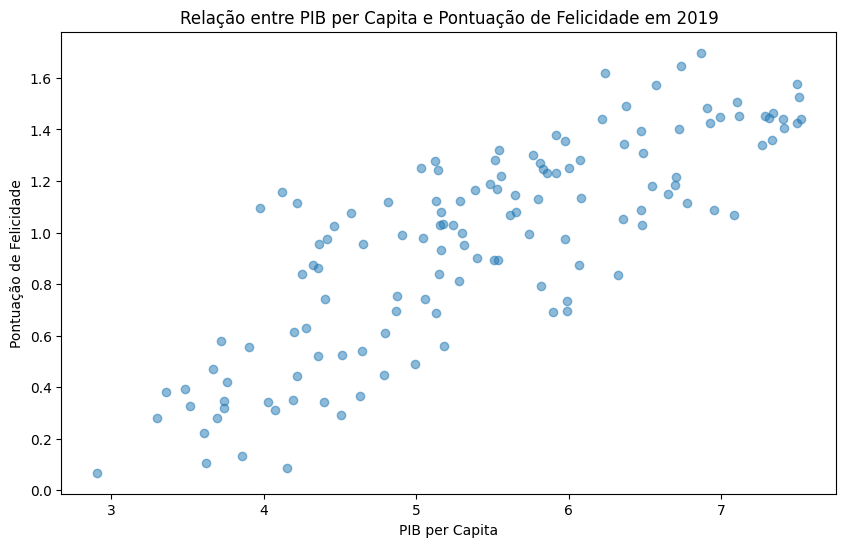

In [49]:
import matplotlib.pyplot as plt

# Defina os dados para os eixos x e y
x = data['Felicidade']
y = data['PIB_Per_Capita']

# Crie o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(x, y, alpha=0.5)  # Cria o scatter plot com transparência

# Adicione rótulos aos eixos
plt.xlabel('PIB per Capita')
plt.ylabel('Pontuação de Felicidade')
plt.title('Relação entre PIB per Capita e Pontuação de Felicidade em 2019')

# Exiba o gráfico
plt.show()

b) Qual é a conclusão de **Países mais ricos são mais felizes?**

É possível perceber que quanto maior o PIB per capita maior a felicidade

## QUESTÃO 10

**Aonde se localizam os países mais felizes? Europa? Ásia?....**

a) Calcule a média da pontuação de felicidade (Score) em todo o DataFrame.


In [51]:
##seu codigo começa aqui
media_felicidade = data['Felicidade'].mean()
print(f"A média de felicidade é {media_felicidade:.2f}")

A média de felicidade é 5.43


b) Crie dois DataFrames separados: um com os países com pontuação de felicidade acima da média e outro com os países com pontuação abaixo da média.

In [52]:

df_feli_baixa = data[data['Felicidade'] <= media_felicidade]
df_feli_alta = data[data['Felicidade'] > media_felicidade]


In [53]:
df_feli_baixa

,Países,Felicidade,PIB_Per_Capita,confian_gov,Continentes,ano,Rotulo_Confianca
593,Kosovo,5.401,0.90145,0.06547,Europe,2019,Baixa
594,Turkey,5.389,1.16492,0.12348,Asia,2019,Baixa
595,Indonesia,5.314,0.95104,0.00322,Asia,2019,Baixa
596,Jordan,5.303,0.99673,0.13297,Asia,2019,Baixa
597,Azerbaijan,5.291,1.12373,0.17914,Asia,2019,Alta
...,...,...,...,...,...,...,...
655,Rwanda,3.515,0.32846,0.50521,Africa,2019,Alta
656,Benin,3.484,0.39499,0.06681,Africa,2019,Baixa
657,Afghanistan,3.360,0.38227,0.07112,Asia,2019,Baixa
658,Togo,3.303,0.28123,0.11587,Africa,2019,Baixa


In [54]:
df_feli_alta

,Países,Felicidade,PIB_Per_Capita,confian_gov,Continentes,ano,Rotulo_Confianca
528,Denmark,7.526,1.44178,0.44453,Europe,2019,Alta
529,Switzerland,7.509,1.52733,0.41203,Europe,2019,Alta
530,Iceland,7.501,1.42666,0.14975,Europe,2019,Alta
531,Norway,7.498,1.57744,0.35776,Europe,2019,Alta
532,Finland,7.413,1.40598,0.41004,Europe,2019,Alta
...,...,...,...,...,...,...,...
588,Paraguay,5.538,0.89373,0.07396,South America,2019,Baixa
589,Romania,5.528,1.16970,0.00679,Europe,2019,Baixa
590,Estonia,5.517,1.27964,0.18519,Europe,2019,Alta
591,Jamaica,5.510,0.89333,0.04294,South America,2019,Baixa


c) Para cada um dos dois DataFrames criados no item b, crie subgrupos calculando a contagem de países por continente (coluna "Region"). dica: .value_counts()

In [58]:

qntd_paises_feli_baixa = df_feli_baixa.value_counts('Continentes')
print(qntd_paises_feli_baixa)

Continentes
Africa           29
Asia             24
Europe           10
South America     4
dtype: int64


In [57]:
qntd_paises_feli_alta = df_feli_alta.value_counts('Continentes')
print(qntd_paises_feli_alta)

Continentes
Europe           28
South America    16
Asia             13
Africa            3
North America     3
Australia         2
dtype: int64


d) Calcule a porcentagem que cada continente representa em relação ao total de países em cada grupo.

In [59]:
## lembre-se :porcentagem_acima_da_media = (contagem_acima_da_media / len(acima_da_media)) * 100

porcentagem_acima_da_media = (qntd_paises_feli_alta / len(df_feli_alta)) * 100

porcentagem_abaixo_da_media = (qntd_paises_feli_baixa / len(df_feli_baixa)) * 100



e) Crie gráficos de barras que mostrem a porcentagem de cada continente nos grupos de alta felicidade e baixa felicidade.

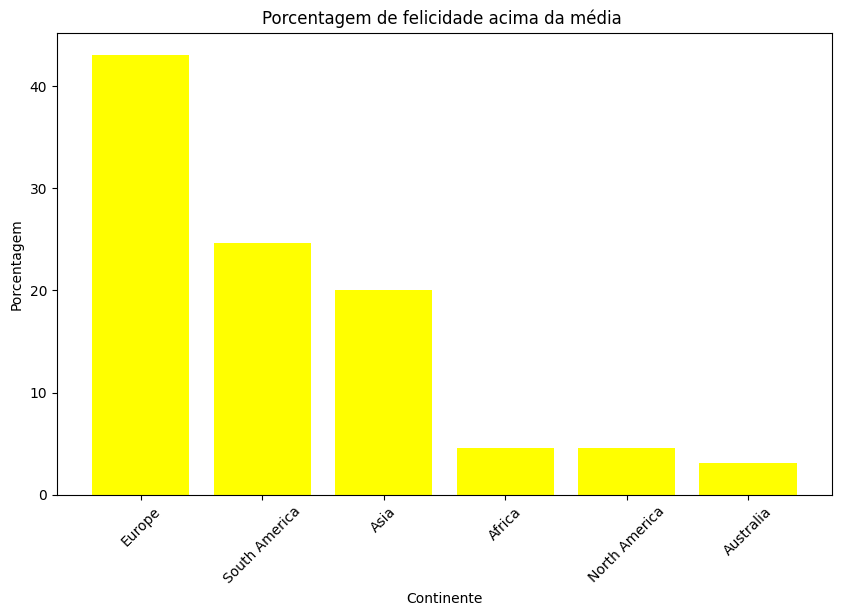

In [64]:

##seu codigo começa aqui

import matplotlib.pyplot as plt

# Gráfico de barras para o grupo de alta felicidade

plt.figure(figsize=(10, 6))
plt.bar(porcentagem_acima_da_media.index, porcentagem_acima_da_media, color='yellow')
plt.title('Porcentagem de felicidade acima da média ')
plt.xlabel('Continente')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()




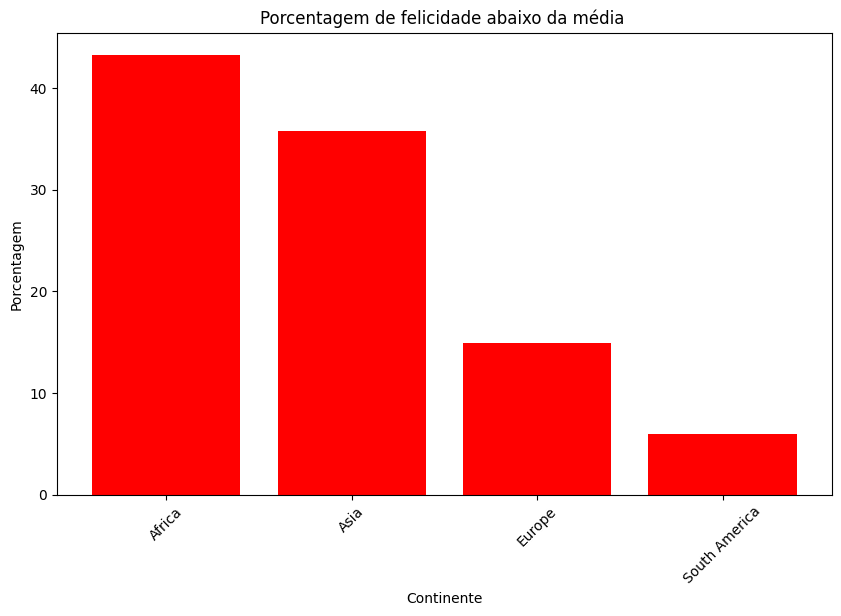

In [67]:
##seu codigo começa aqui

import matplotlib.pyplot as plt

# Gráfico de barras para o grupo de alta felicidade

plt.figure(figsize=(10, 6))
plt.bar(porcentagem_abaixo_da_media.index, porcentagem_abaixo_da_media, color='red')
plt.title('Porcentagem de felicidade abaixo da média ')
plt.xlabel('Continente')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()




f)  Qual é a conclusão da questão: **Aonde se localizam os países mais felizes? Europa? Ásia?....**

Os países mais felizes estão na Europa e América do Sul